In [1]:
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [12]:
hsc_dir_name = '/data/des90.a/data/jsanch87/HSC/PDR2/'
hsc_files = ['HSC_i_lt_22.fits',\
             'HSC_22_i_22p5.fits',\
             'HSC_23p5_i_24p5.fits',\
             'HSC_24p5_i_25.fits']

delve_dir_name = '/data/des91.b/data/kadrlica/projects/delve/cat/y2t1/r1/cat/'
delve_base_file_name = 'cat_hpx_'
delve_ext = '.fits'

delve_pix_list = '/home/s1/djsuson/data/delve_pix_list.txt'

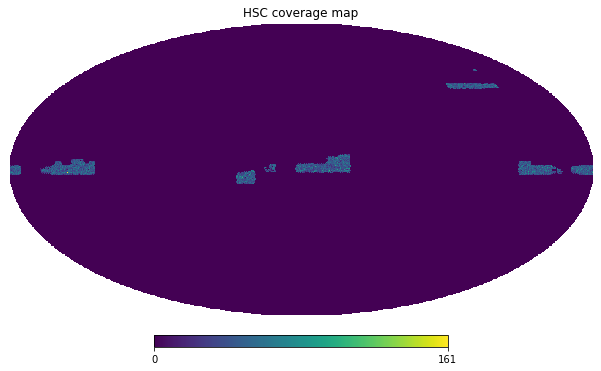

In [10]:
dispSides = 4096
hsc_combined = {}
hsc_combined['dec'] = []
hsc_combined['ra'] = []

# Generate combined HSC catalog
for hsc_file_name in hsc_files:
  hsc_data = getdata(hsc_dir_name+hsc_file_name, 1)
  if len(hsc_combined)  == 0:
    hsc_combined['dec'] = hsc_data['dec']
    hsc_combined['ra'] = hsc_data['ra']
  else:
    hsc_combined['dec'] = np.concatenate((hsc_combined['dec'], hsc_data['dec']))
    hsc_combined['ra'] = np.concatenate((hsc_combined['ra'], hsc_data['ra']))

coverage_map = np.bincount(hp.ang2pix(dispSides, hsc_combined['ra'], hsc_combined['dec'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(coverage_map, title='HSC coverage map')
plt.show()

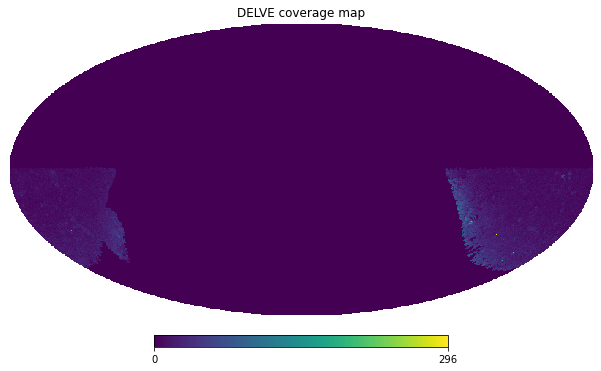

In [16]:
# Get overlapping pixel list
delve_combined = {}
delve_combined['DEC'] = []
delve_combined['RA'] = []

delve_pixel_list = np.genfromtxt(delve_pix_list, dtype='str')

# Open Delve pixel
for pixel in delve_pixel_list:
  delve_fqpn = delve_dir_name + delve_base_file_name + pixel + delve_ext
  delve_data = getdata(delve_fqpn, 1)

  if len(delve_combined)  == 0:
    delve_combined['DEC'] = delve_data['DEC']
    delve_combined['RA'] = delve_data['RA']
  else:
    delve_combined['DEC'] = np.concatenate((delve_combined['DEC'], delve_data['DEC']))
    delve_combined['RA'] = np.concatenate((delve_combined['RA'], delve_data['RA']))

coverage_map = np.bincount(hp.ang2pix(dispSides, delve_combined['RA'], delve_combined['DEC'], lonlat=True), minlength=12*dispSides**2)
hp.mollview(coverage_map, title='DELVE coverage map')
plt.show()